<a href="https://colab.research.google.com/github/VSennaa/ml_diabetes_classification/blob/main/perceptron_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Artigo Classificação de Diabétes com Perceptron
Colaboradores:
<p>Lucas Nunes Assumpção
<p>Pedro Henrique Araújo
<p>Victor Diniz Pessoa
<p>Vinicios Rodrigo Sena Martins

# O que é Perceptron
<p> Trata-se de um classificador linear binário, ou seja, um algoritmo capaz de discriminar duas classes através do plano cartesiano, neste caso, entre diabéticos e não diabéticos. Sua implementação consta na função treinar_perceptron.

# Conjunto de Dados (dataset)
<p>Nosso dataset foi obtido na plataforma kaggle e possui seu resumo abaixo:

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [144]:
# Carregametno do dataset
url = 'https://raw.githubusercontent.com/VSennaa/ml_diabetes_classification/refs/heads/main/Dataset_of_Diabetes.csv'
df = pd.read_csv(url)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


###Análise Exploratória
<p>Verificar se há dados faltantes e registrar os dados relevantes para classificação

In [145]:
print("Dados faltantes por coluna:")
df.info()

Dados faltantes por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


É possível notar que não há dados faltantes e nem duplicatas

In [146]:
print(df.isnull().sum())
print(df.duplicated().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64
0


###Conversão de dados categóricos em numéricos

In [147]:
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})
df["CLASS"] = df["CLASS"].map({"N": 0, "P": 1})
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,34221,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,420,47975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,680,87656,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,504,34223,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [148]:
print(df.describe())

                ID     No_Pation      Gender          AGE         Urea  \
count  1000.000000  1.000000e+03  999.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    0.434434    53.528000     5.124743   
std     240.397673  3.380758e+06    0.495931     8.799241     2.935165   
min       1.000000  1.230000e+02    0.000000    20.000000     0.500000   
25%     125.750000  2.406375e+04    0.000000    51.000000     3.700000   
50%     300.500000  3.439550e+04    0.000000    55.000000     4.600000   
75%     550.250000  4.538425e+04    1.000000    59.000000     5.700000   
max     800.000000  7.543566e+07    1.000000    79.000000    38.900000   

                Cr        HbA1c         Chol           TG          HDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     68.943000     8.281160     4.862820     2.349610     1.204750   
std      59.984747     2.534003     1.301738     1.401176     0.660414   
min       6.000000     0.900000     0

###Verificando Balanceamento do DF

<Axes: title={'center': 'Distribuição da Classe'}, xlabel='Classe', ylabel='Proporção'>

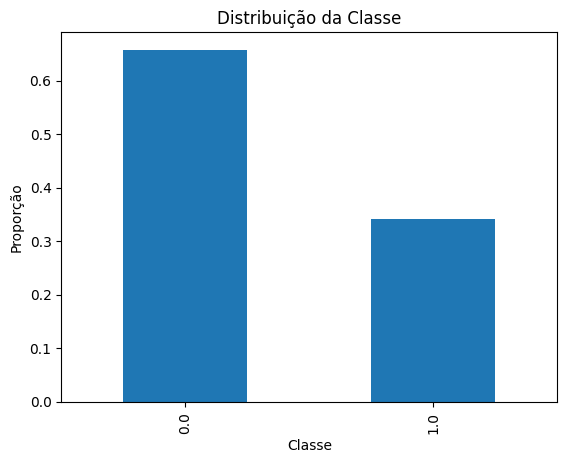

In [149]:
df["CLASS"].value_counts(normalize=True).plot(kind='bar', title="Distribuição da Classe", xlabel="Classe", ylabel="Proporção")

##Escolha dos Dados
<p>Utilizando a correlação de Pearson para escolher os dados relevantes para a classificação

In [150]:
# Correlação com a classe
print(corr["CLASS"].sort_values(ascending=False))

CLASS        1.000000
HbA1c        0.674914
BMI          0.360858
TG           0.224478
Chol         0.122636
ID           0.051854
Cr           0.048171
VLDL         0.014595
Urea        -0.031320
AGE         -0.054111
No_Pation   -0.059678
LDL         -0.065415
HDL         -0.103024
Gender      -0.291265
Name: CLASS, dtype: float64


##Classes selecionadas:


Baseado na correleção de pearson, optou-se por HbA1c (0.674914) e BMI (0.360858), por serem classes mais fortemente relacionadas.

In [151]:
from sklearn.utils import resample

df_majority = df[df.CLASS == 0]
df_minority = df[df.CLASS == 1]

# Fazer downsample da classe majoritária para o tamanho da minoritária
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combinar os dados balanceados
df_balanced = pd.concat([df_majority_downsampled, df_minority]).sample(frac=1, random_state=42)

# Selecionar features relevantes
features = ["HbA1c", "BMI", "TG", "Chol"]
X = df_balanced[features].values.T
y = df_balanced["CLASS"].values.astype(int)


## --- Separar treino (60%), validação (20%) e teste (20%) ---
<p>Como sklearn separa por linha, precisamos fazer um "transpose" para facilitar

In [152]:
from sklearn.model_selection import train_test_split

X_t = X.T  # (amostras x features)

X_temp, X_test, y_temp, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
# 0.25 * 0.8 = 0.2 (20% validação)

# Transpor para (features x amostras)
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

# --- Normalizar usando só dados de treino ---
mean_train = X_train.mean(axis=1, keepdims=True)
std_train = X_train.std(axis=1, keepdims=True)

X_train_norm = (X_train - mean_train) / std_train
X_val_norm = (X_val - mean_train) / std_train
X_test_norm = (X_test - mean_train) / std_train


##Configurando Bias

In [153]:
def add_bias(X):
    bias = np.ones((1, X.shape[1]))
    return np.vstack([bias, X])

X_train_bias = add_bias(X_train_norm)
X_val_bias = add_bias(X_val_norm)
X_test_bias = add_bias(X_test_norm)

##Treinamento

In [154]:
import numpy as np

def treinar_perceptron(x, y, w_inicial, eta=0.1, max_iter=1000):
    """
    Treina um perceptron simples.

    Parâmetros:
        x (ndarray): Matriz de entrada (shape: 3 x N).
        y (ndarray): Vetor de saídas esperadas (shape: N).
        w_inicial (ndarray): Pesos iniciais (shape: 3 x 1).
        eta (float): Taxa de aprendizado.
        max_iter (int): Número máximo de iterações para evitar loops infinitos.

    Retorna:
        w (ndarray): Pesos finais treinados.
        cont (int): Número de atualizações realizadas.
    """
    w = w_inicial.copy()
    e = np.ones(len(y))
    cont = 0
    iteracoes = 0

    while np.any(e) and iteracoes < max_iter:
        for i in range(len(y)):
            u = np.dot(x[:, i], w)
            f = ((np.sign(u) + 1) / 2).item()  # garante que f é escalar
            e[i] = y[i] - f
            w += eta * e[i] * x[:, i].reshape(-1, 1)
            cont += 1
        iteracoes += 1

    return w, cont


In [155]:
w_inicial = np.zeros((X_train_bias.shape[0], 1))
w_final, atualizacoes = treinar_perceptron(X_train_bias, y_train, w_inicial, eta=0.01, max_iter=5000)


#Analisando resultados

In [156]:
def prever(x, w):
    """
    Realiza a predição dos dados de entrada usando os pesos treinados.

    Parâmetros:
        x (ndarray): Matriz de entrada (shape: 3 x N).
        w (ndarray): Vetor de pesos treinado (shape: 3 x 1).

    Retorna:
        y_pred (ndarray): Vetor de predições (0 ou 1).
    """
    u = np.dot(w.T, x)
    u = np.nan_to_num(u)  # Tratamento de NaNs
    y_pred = ((np.sign(u) + 1) / 2).astype(int).flatten()
    return y_pred

In [157]:
y_val_pred = prever(X_val_bias, w_final)
print("Validação - Acurácia:", accuracy_score(y_val, y_val_pred) * 100)
print(classification_report(y_val, y_val_pred))

Validação - Acurácia: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



#Avaliação do Resultado de 100%


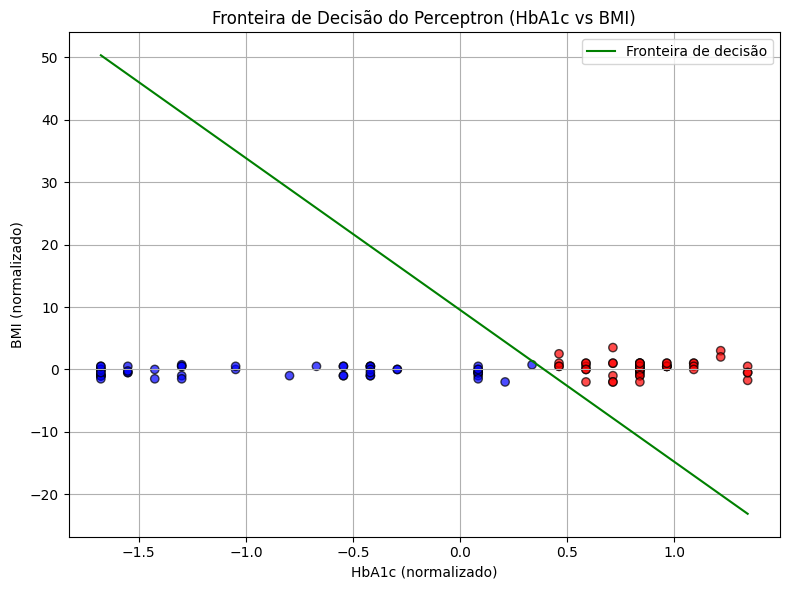

In [160]:
# 1. Seleção das features 2D
features_2d = ["HbA1c", "BMI"]
df_2d = df_balanced[features_2d + ["CLASS"]].copy()

# 2. Remoção de outliers (±3 desvios padrão por coluna)
for col in features_2d:
    mean = df_2d[col].mean()
    std = df_2d[col].std()
    df_2d = df_2d[(df_2d[col] >= mean - 3*std) & (df_2d[col] <= mean + 3*std)]

# 3. Extração e normalização dos dados
X_2d = df_2d[features_2d].values.T
y_2d = df_2d["CLASS"].values.astype(int)

mean_2d = X_2d.mean(axis=1, keepdims=True)
std_2d = X_2d.std(axis=1, keepdims=True)
X_2d_norm = (X_2d - mean_2d) / std_2d


X_2d_bias = add_bias(X_2d_norm)

# 4. Treinar perceptron com 2D
w_ini_2d = np.zeros((X_2d_bias.shape[0], 1))
w_2d, _ = treinar_perceptron(X_2d_bias, y_2d, w_ini_2d, eta=0.01, max_iter=5000)

# 5. Plotar gráfico com fronteira de decisão
import matplotlib.pyplot as plt

# Dados normalizados para plotagem
HbA1c = X_2d_norm[0, :]
BMI = X_2d_norm[1, :]
labels = y_2d

plt.figure(figsize=(8, 6))
scatter = plt.scatter(HbA1c, BMI, c=labels, cmap='bwr', alpha=0.7, edgecolors='k')
plt.xlabel("HbA1c (normalizado)")
plt.ylabel("BMI (normalizado)")
plt.title("Fronteira de Decisão do Perceptron (HbA1c vs BMI)")

# Fronteira de decisão: w0*1 + w1*x + w2*y = 0 → y = -(w0 + w1*x) / w2
x_vals = np.linspace(HbA1c.min(), HbA1c.max(), 100)
w0, w1, w2 = w_2d.flatten()
y_vals = -(w0 + w1 * x_vals) / w2
plt.plot(x_vals, y_vals, color='green', label='Fronteira de decisão')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ao observa-se a fronteira de decisão precisa é possível concluir que é possível para esse caso um resultado de 100%